In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

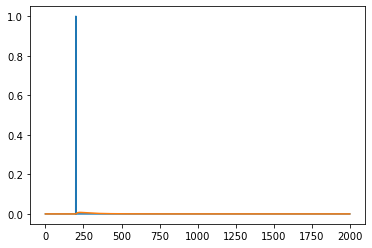

In [2]:
def convolve_tail(pulse, t, tau):
    tail = np.exp(-t/tau)
    scattered_pulse = np.fft.irfft( np.fft.rfft(pulse) * np.fft.rfft(tail[::-1]).conj() )
    scattered_pulse /= np.sum(scattered_pulse)
    return scattered_pulse

x = np.linspace(0,2000,2000)

pulse = np.zeros_like(x)
pulse[200] = 1

plt.plot(x, pulse)

pulse_scattered = convolve_tail(pulse, x, 100)
pulse_scattered = convolve_tail(pulse_scattered, x, 10)

plt.plot(x, pulse_scattered)

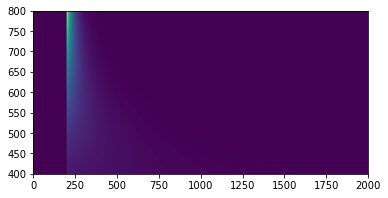

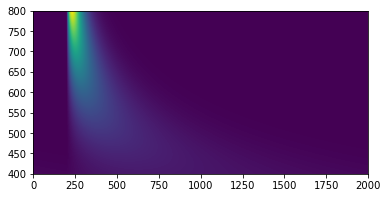

In [6]:
f = np.linspace(800,400, 1024)
fref = 600.

tau0 = 100 * (f/fref)**(-4)
tau1 = 100 * (f/fref)**(-4)

pulse_2D = np.zeros( (len(f), len(x) ) )

for i in range(len(f)):
    profi = convolve_tail(pulse, x, tau0[i])
    pulse_2D[i] = profi

plt.figure(figsize=(6,3))
plt.imshow(pulse_2D, extent=[0, max(x), min(f), max(f)], aspect='auto')
    
for i in range(len(f)):
    profi = convolve_tail(pulse_2D[i], x, tau1[i])
    pulse_2D[i] = profi
    
plt.figure(figsize=(6,3))
plt.imshow(pulse_2D, extent=[0, max(x), min(f), max(f)], aspect='auto')


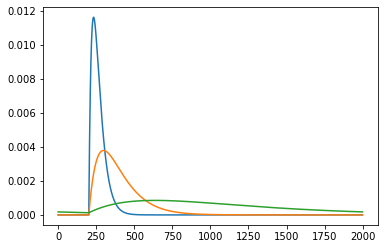

In [5]:
plt.plot(pulse_2D[0])
plt.plot(pulse_2D[500])
plt.plot(pulse_2D[1000])
         